In [12]:
import os
  
# change the current directory 
# to specified directory 
os.chdir(r"/content/drive/My Drive/Project_tasks/scratch_class") 
	
os.getcwd()

'/content/drive/My Drive/Project_tasks/scratch_class'

In [0]:
from keras.datasets import mnist #replace mnist with any dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:
import numpy as np
import os
from matplotlib import pyplot as plt
import cv2
import random
import pickle


file_list = []
class_list = []

DATADIR = "image_class"

# All the categories you want your neural network to detect
CATEGORIES = ["artstudio", "auditorium", "bakery", "bar", "bathroom","bedroom"]

# The size of the images that your neural network will use
IMG_SIZE = 50

# Checking or all images in the data folder
for category in CATEGORIES :
	path = os.path.join(DATADIR, category)
	for img in os.listdir(path):
		img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)

training_data = []

def create_training_data():
	for category in CATEGORIES :
		path = os.path.join(DATADIR, category)
		class_num = CATEGORIES.index(category)
		for img in os.listdir(path):
			try :
				img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
				new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
				training_data.append([new_array, class_num])
			except Exception as e:
				pass

create_training_data()

random.shuffle(training_data)

X = [] #features
y = [] #labels

for features, label in training_data:
	X.append(features)
	y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

# Creating the files containing all the information about your model
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Using TensorFlow backend.


Train on 540 samples, validate on 60 samples
Epoch 1/40
540/540 [==============================] - 1s 3ms/sample - loss: 1.7785 - acc: 0.1981 - val_loss: 1.7168 - val_acc: 0.3000
Epoch 2/40
540/540 [==============================] - 0s 195us/sample - loss: 1.5483 - acc: 0.3352 - val_loss: 1.3333 - val_acc: 0.5167
Epoch 3/40
540/540 [==============================] - 0s 192us/sample - loss: 1.3997 - acc: 0.3648 - val_loss: 1.3355 - val_acc: 0.3667
Epoch 4/40
540/540 [==============================] - 0s 181us/sample - loss: 1.3531 - acc: 0.3981 - val_loss: 1.2433 - val_acc: 0.4500
Epoch 5/40
540/540 [==============================] - 0s 180us/sample - loss: 1.3237 - acc: 0.4278 - val_loss: 1.2605 - val_acc: 0.3833
Epoch 6/40
540/540 [==============================] - 0s 178us/sample - loss: 1.3198 - acc: 0.4630 - val_loss: 1.3075 - val_acc: 0.4500
Epoch 7/40
540/540 [==============================] - 0s 178us/sample - loss: 1.3181 - acc: 0.4667 - val_loss: 1.2204 - val_acc: 0.4833
Epoch

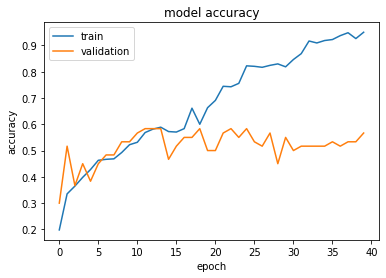

In [14]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
from keras.models import model_from_json
from keras.models import load_model
import matplotlib.pyplot as plt

# Opening the files about data
X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

# normalizing data (a pixel goes from 0 to 255)
X = X/255.0

# Building the model
model = Sequential()
# 3 convolutional layers
model.add(Conv2D(32, (3, 3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 2 hidden layers
model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))

model.add(Dense(128))
model.add(Activation("relu"))

# The output layer with 13 neurons, for 13 classes
model.add(Dense(6))
model.add(Activation("softmax"))

# Compiling the model using some basic parameters
model.compile(loss="sparse_categorical_crossentropy",
				optimizer="adam",
				metrics=["accuracy"])

# Training the model, with 40 iterations
# validation_split corresponds to the percentage of images used for the validation phase compared to all the images
history = model.fit(X, y, batch_size=32, epochs=40, validation_split=0.1)

# Saving the model
model_json = model.to_json()
with open("model.json", "w") as json_file :
	json_file.write(model_json)

model.save_weights("model.h5")
print("Saved model to disk")

model.save('CNN.model')

# Printing a graph showing the accuracy changes during the training phase
print(history.history.keys())
plt.figure(1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

In [27]:
import tensorflow as tf 
IMAGE_SHAPE = (50, 50)
data_root ='Test_image/'
TRAINING_DATA_DIR = str(data_root)
print(TRAINING_DATA_DIR);
datagen_kwargs = dict(rescale=1./255, validation_split=.20)
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
valid_generator = valid_datagen.flow_from_directory(
TRAINING_DATA_DIR,
color_mode="grayscale",
#subset="validation",
shuffle=True,
target_size=IMAGE_SHAPE
)


Test_image/
Found 18 images belonging to 6 classes.


In [28]:
import numpy as np
val_image_batch,val_label_batch = next(iter(valid_generator))
true_label_ids = np.argmax(val_label_batch, axis=-1)
print("Validation batch shape:", val_image_batch.shape)

Validation batch shape: (18, 50, 50, 1)


In [29]:
dataset_labels = sorted(valid_generator.class_indices.items(), key=lambda pair:pair[1])
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print(dataset_labels)

['Artstudio' 'Auditorium' 'Bakery' 'Bar' 'Bathroom' 'Bedroom']


In [31]:
import cv2
import tensorflow as tf
import os
import glob
import pandas as pd
CATEGORIES = ["artstudio", "auditorium", "bakery", "bar", "bathroom","bedroom"]
"""
def prepare(file):
    IMG_SIZE = 50
    img_array = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
model = tf.keras.models.load_model("CNN.model")
image_1 = []
#image = "Test_image/" #your image path

img_dir = "Test_image/" # Enter Directory of all images 
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
#data = []
for f1 in files:
  imge = prepare(f1)
  image_1.append(imge)
"""
prediction = model.predict([val_image_batch])
tf_pred_dataframe = pd.DataFrame(prediction)
tf_pred_dataframe.columns = dataset_labels
print("Prediction results for the first elements")
tf_pred_dataframe.head(10)
#prediction = list(prediction[0])
#print(CATEGORIES[prediction.index(max(prediction))])

Prediction results for the first elements


,Artstudio,Auditorium,Bakery,Bar,Bathroom,Bedroom
0,8.361831e-01,3.636735e-05,3.581583e-06,1.637372e-01,7.545477e-07,3.900966e-05
1,8.342272e-05,4.014586e-07,2.725229e-04,4.305448e-09,1.410768e-03,9.982328e-01
2,1.276863e-03,5.205863e-05,8.058412e-04,3.352242e-05,7.705227e-02,9.207794e-01
3,5.373846e-03,1.533786e-04,1.426753e-06,9.942604e-01,7.591633e-05,1.350036e-04
4,4.286358e-07,1.567993e-03,9.982615e-01,1.692362e-04,3.000700e-08,7.932909e-07
5,3.586279e-02,3.272132e-05,1.227541e-03,1.741695e-05,2.335464e-02,9.395049e-01
6,6.596799e-04,4.644829e-02,1.044839e-01,8.267615e-01,4.249959e-03,1.739657e-02
7,1.020405e-05,6.838659e-04,8.462587e-08,9.992913e-01,2.945562e-08,1.446684e-05
8,2.669373e-03,9.541087e-01,1.762473e-06,4.321515e-02,9.626738e-10,5.091454e-06
9,3.500013e-04,4.415819e-06,9.875433e-01,2.351010e-04,9.080226e-05,1.177634e-02


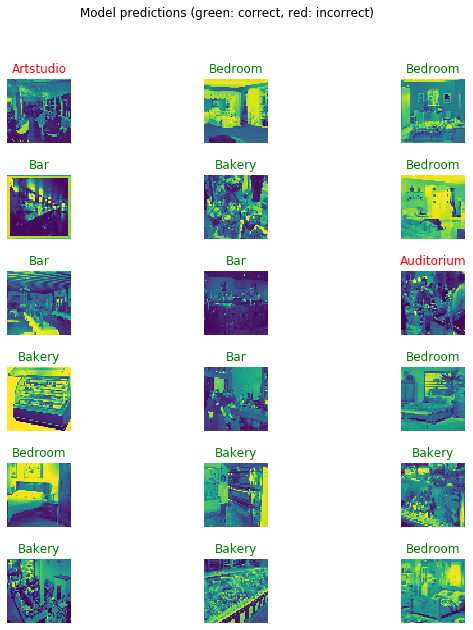

In [41]:
predicted_ids = np.argmax(prediction, axis=-1)
predicted_labels = dataset_labels[predicted_ids]
plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace=0.5)
for n in range(18):
  plt.subplot(6,3,n+1)
  plt.imshow(np.squeeze(val_image_batch[n]))
  color = "green" if predicted_ids[n] == true_label_ids[n] else "red"
  plt.title(predicted_labels[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")

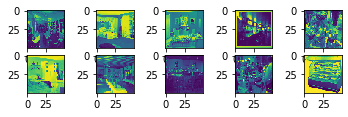

In [36]:
for n in range(10):
  plt.subplot(5,5,n+1)
  plt.imshow(np.squeeze(val_image_batch[n]))

In [0]:
import cv2
import tensorflow as tf
import os
import glob

image_1 = []
#image = "Test_image/" #your image path

img_dir = "Test_image/" # Enter Directory of all images 
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
#data = []
for f1 in files:
  imge = prepare(f1)
  image_1.append(imge)

 

In [0]:
IMG_SIZE = 50
img_array = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [0]:
import numpy as np
x=np.array(valid_generator)
print(x.shape)


In [0]:
gray = []
for j in range(0,len(data)):
    gray.append(cv2.cvtColor(np.array(data[j]), cv2.COLOR_BGR2GRAY))